In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
IRIS_DF=pd.read_csv("/content/IRIS.csv")


In [3]:
IRIS_DF.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
IRIS_DF.shape

(150, 5)

In [5]:
IRIS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
IRIS_DF.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Since there are no null values we proceed with the code

In [7]:
IRIS_DF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


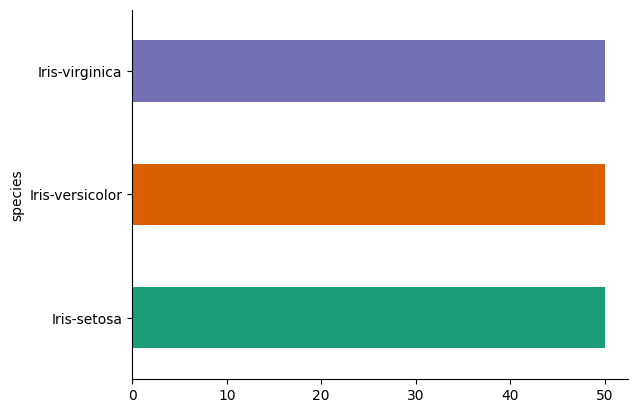

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
IRIS_DF.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

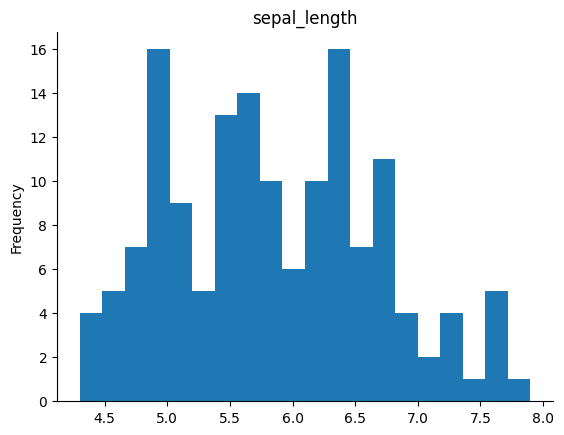

In [11]:
IRIS_DF['sepal_length'].plot(kind='hist', bins=20, title='sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

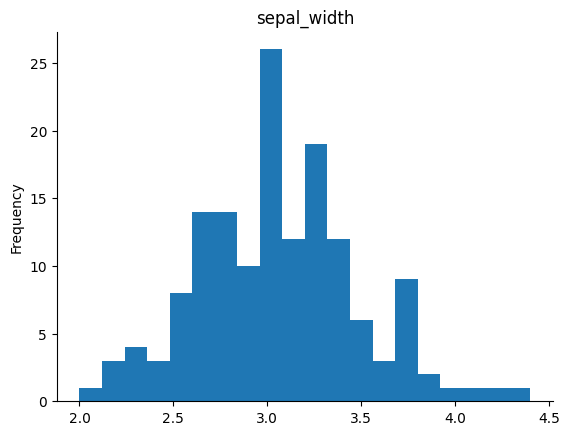

In [18]:
IRIS_DF['sepal_width'].plot(kind='hist', bins=20, title='sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

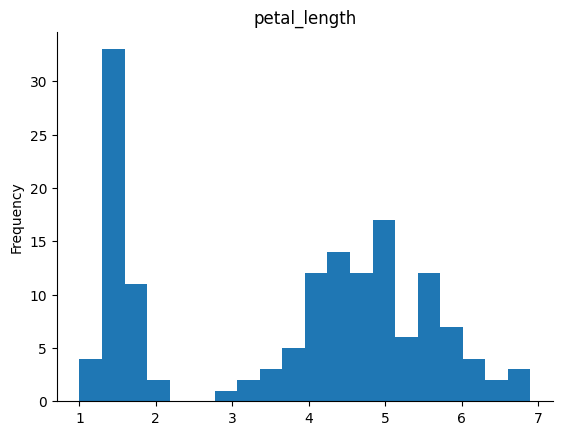

In [19]:
IRIS_DF['petal_length'].plot(kind='hist', bins=20, title='petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

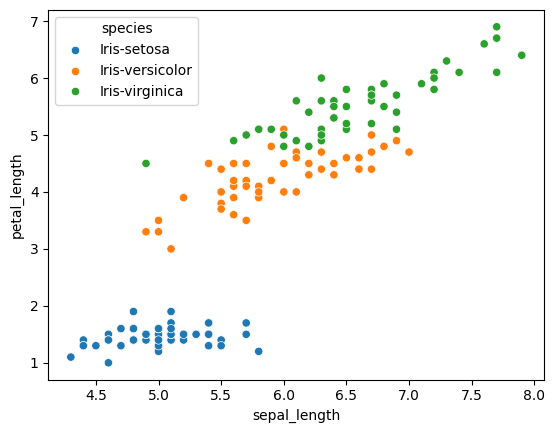

In [20]:
sns.scatterplot(data=IRIS_DF, x="sepal_length", y="petal_length", hue="species")

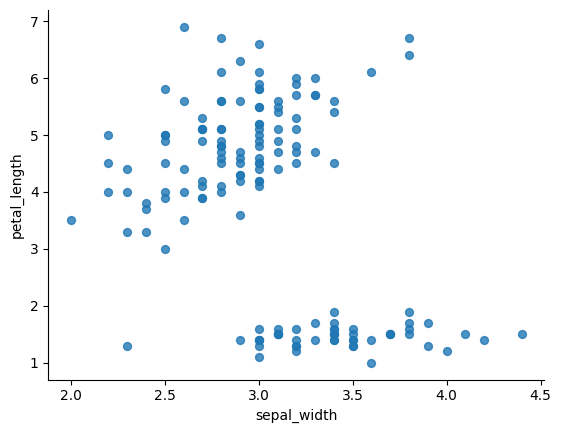

In [21]:
IRIS_DF.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='species', ylabel='sepal_length'>

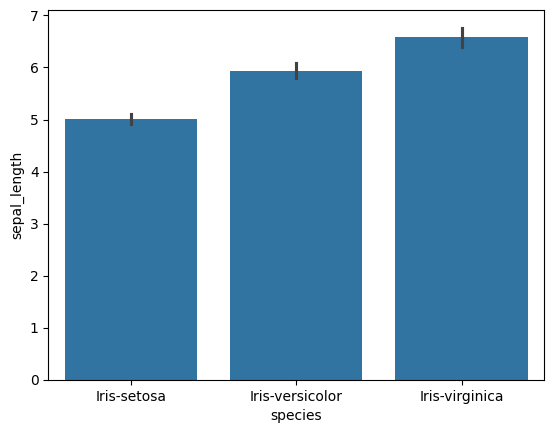

In [22]:
sns.barplot(x = 'species', y = 'sepal_length', data = IRIS_DF)

<Axes: xlabel='species', ylabel='sepal_length'>

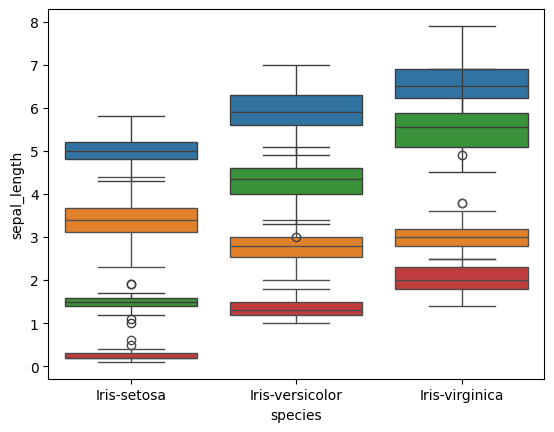

In [23]:
sns.boxplot(data=IRIS_DF, x="species", y="sepal_length")
sns.boxplot(data=IRIS_DF, x="species", y="sepal_width")
sns.boxplot(data=IRIS_DF, x="species", y="petal_length")
sns.boxplot(data=IRIS_DF, x="species", y="petal_width")

<Axes: >

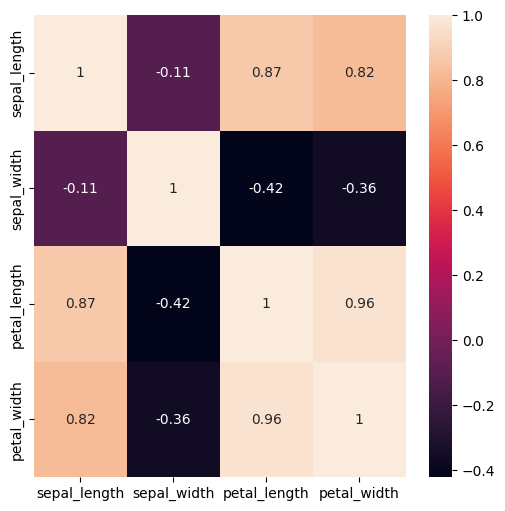

In [27]:

numeric_columns=IRIS_DF.drop(columns='species')
corr=numeric_columns.corr()
fig,axis=plt.subplots(figsize=(6,6))
sns.heatmap(corr,annot=True,ax=axis)

In [28]:
L_E=LabelEncoder()

In [29]:
IRIS_DF['species']=L_E.fit_transform(IRIS_DF['species'])

In [31]:
X_X=IRIS_DF.drop(columns='species')

In [32]:
Y_Y=IRIS_DF['species']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X_X,Y_Y,random_state=0)

In [37]:
x_train.shape

(112, 4)

In [38]:
x_test.shape

(38, 4)

In [39]:
y_train.shape

(112,)

In [40]:
y_test.shape

(38,)

In [41]:
Model_lr=LogisticRegression()

In [43]:
Model_lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
y_pred=Model_lr.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
accuracy_model=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy_model))

Accuracy of the model is 97.37


In [60]:
Model_KNN=KNeighborsClassifier()

In [61]:

Model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
Y_Pred=Model_KNN.predict(x_test)
Y_Pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [63]:
accuracy_model_KNN=Model_KNN.score(x_test,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy_model_KNN))

Accuracy of the model is 97.37
